# Packages Imports

In [ ]:
# Import packages needed for the lab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Function definitions

In [ ]:
def accuracy_no_neutral(y_test, y_pred) :
    y_test_no_neutral = []
    y_pred_no_neutral = []
    for i in range (len(y_test)) :
        if (y_test[i] != 0) :
            y_test_no_neutral.append(y_test[i])
            y_pred_no_neutral.append(y_pred[i])
    return accuracy_score(y_test_no_neutral, y_pred_no_neutral)

In [ ]:
def accuracy_binary(y_test, y_pred) :
    y_test_binary = [val if val == 0 else -1 for val in y_test]
    y_pred_binary = [val if val == 0 else -1 for val in y_pred]
    
    return accuracy_score(y_test_binary, y_pred_binary)

In [ ]:
def scores(model, x_train, x_test, y_train, y_test, show = False) :
    
    y_pred = model.predict(x_test)

    # Scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_nn = accuracy_no_neutral(y_test, y_pred)
    accuracy_bin = accuracy_binary(y_test, y_pred)

    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    scores = [accuracy, accuracy_nn, accuracy_bin, recall]
    
    if (show) : 
        print("Accuracy : ", accuracy)
        print("Accuracy (no neutral) : ", accuracy_nn)
        print("Accuracy (binary) : ", accuracy_bin)
        print("Recall : ", recall)
        
        confusion_matrix_plot(y_test, y_pred)

    return scores
    

In [ ]:
def confusion_matrix_plot(y_test, y_pred) :

    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10,10))

    sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', cbar=False)
    title = "Confusion Matrix"
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

In [ ]:
def add_two_list(x1, x2):
    if(len(x1) != len(x2)):
        print ("terms for sum sizes mismatch : x1:", len(x1), ", x2:", len(x2))
    x3 = []
    for i in range(len(x1)):
        x3.append(x1[i] + x2[i])
    return x3

def selfsum_lists (list):
    sum = np.zeros(250)
    for k in range (len(list)):
        sum = add_two_list(sum, list[k])
    return sum

def div_list(x, d, size):
    if(len(x) != size):
        raise Exception("size mismatch")
    y = []
    for i in range(size):
        y.append(x[i] / d)
    return y

In [ ]:
def bar_plot(labels, score_list, title) :
    acc = [score_list[i][1][0] for i in range (len(score_list))]
    acc_nn = [score_list[i][1][1] for i in range (len(score_list))]
    acc_bin = [score_list[i][1][2] for i in range (len(score_list))]
    recalls = [score_list[i][1][3] for i in range (len(score_list))]

    accuracies = ["Accuracy", "Accuracy w/o neutral", "Accuracy binary"]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    width = 0.2
    
    ax1.bar(np.arange(len(labels)) - width, acc, width)
    ax1.bar(np.arange(len(labels)), acc_nn, width)
    ax1.bar(np.arange(len(labels)) + width, acc_bin, width)
    ax1.set_title(title)
    ax1.legend(accuracies,  loc='lower right')
    ax1.set_xticks(np.arange(len(labels)), labels)

    ax2.bar(labels, recalls, width=0.5, color='purple')
    ax2.set_title("Recalls")
    

In [ ]:
def best_option(pair_list) :
    max_acc = 0
    max_recall = 0
    best_option = [0]
    for i in range (len(pair_list)) :
        if (pair_list[i][1][1] > max_acc) :
            max_acc = pair_list[i][1][1]
            best_option[0] = pair_list[i][0]
        elif (pair_list[i][1][1] == max_acc) :
            if (pair_list[i][1][3] > max_recall) :
                max_recall = pair_list[i][1][3]
                best_option[0] = pair_list[i][0]
    return best_option[0]

# Data Import and pre-processing

In [ ]:
# Import the data
data = pd.read_csv("ECG_data/beats_nsvfq_48p.csv")
train = pd.read_csv("ECG_data/train_data.csv")
test = pd.read_csv("ECG_data/test_data.csv")
val = pd.read_csv("ECG_data/val_data.csv")

In [ ]:
label_list = data.iloc[:, -1] 
ECG_samples = data.iloc[:, 0:250]
ECG_samples_array = ECG_samples.to_numpy()

categories = ["N", "/", "L", "R", "e", "j", "A", "a", "J", "S", "E", "F", "V", "f", "Q"]
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
ascii_categories = [78, 47, 76, 82, 101, 106, 65, 97, 74, 83, 69, 70, 86, 102, 81]
colors = ['red', 'green', 'dodgerblue', 'orange', 'magenta', 'cyan', 'darkred', 
          'salmon', 'grey', 'pink', 'limegreen', 'teal', 'saddlebrown', 'goldenrod', 'firebrick']

# Arrhythmias distribution

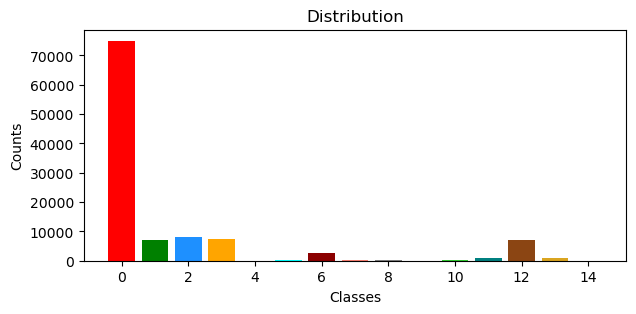

In [ ]:
### Counting how many times each category appears

counts = np.zeros(15)
for l in label_list :
    counts[ascii_categories.index(l)] += 1
    
plt.figure(figsize = [7, 3])
plt.bar(classes, counts, color = colors)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Distribution')
plt.show()

In [ ]:
### Segregating ECGs by category

ECGbyCat = [[] for i in range (15)]
c = 0
for i in label_list :
    ECGbyCat[ascii_categories.index(i)].append(ECG_samples_array[c])
    c += 1

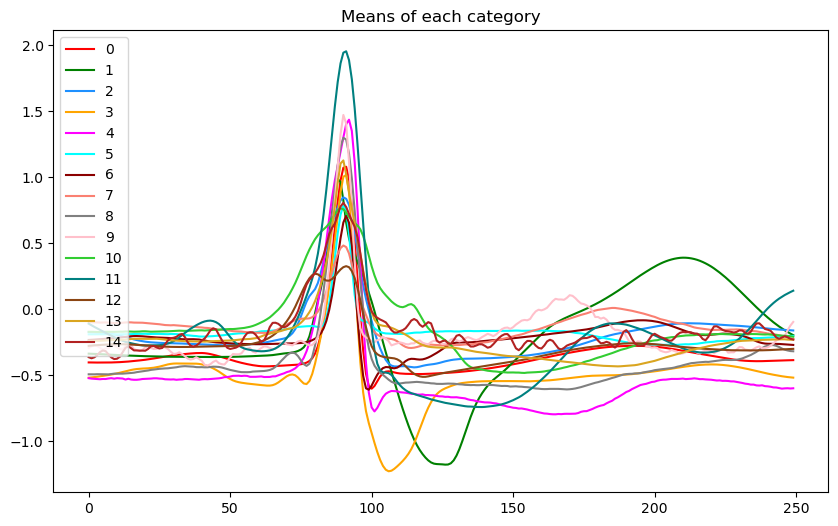

In [ ]:
### Summing and averaging every sum

sums = []
for f in range (15):
    sums.append(selfsum_lists(ECGbyCat[f]))

plt.figure(figsize = [10, 6])
plt.title("Means of each category")


means = [] 
for f in range(15):
    means.append(div_list(sums[f], counts[f], 250))
    plt.plot(means[f], color = colors[f])
    plt.legend(classes)

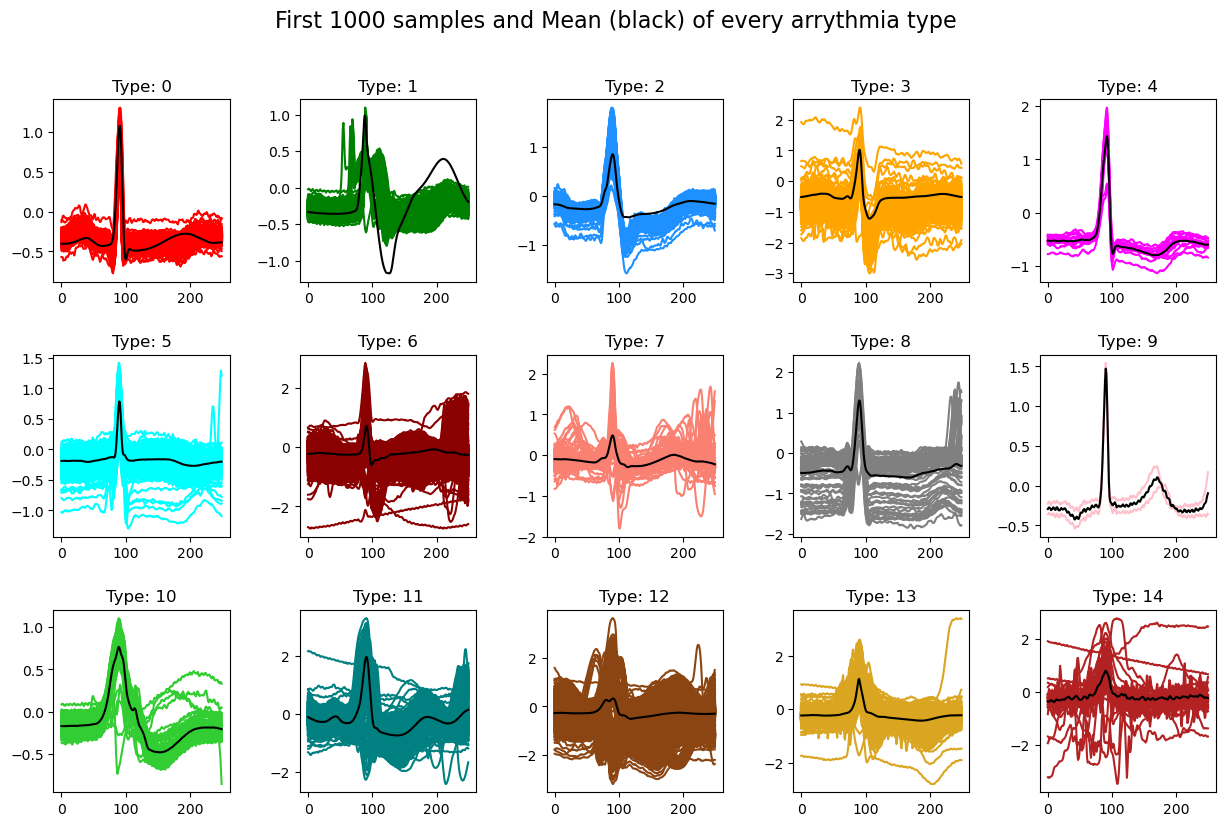

In [ ]:
### Plotting the N_max first ECG samples of each category

N_max = 1000

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('First ' + str(N_max) + ' samples and Mean (black) of every arrythmia type', fontsize = 16)
axes = axes.flatten()

for f in range (15):
    for i in range (min(len(ECGbyCat[f]), N_max)):
        x = np.arange(250)
        y = ECGbyCat[f][i]
        axes[f].plot(x, y, color=colors[f])
    x = np.arange(250)
    y = means[f]
    axes[f].plot(x, y, color='k')
    axes[f].set_title('Type: ' + str(f))
    
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

# PCA processing

### PCA Plotting

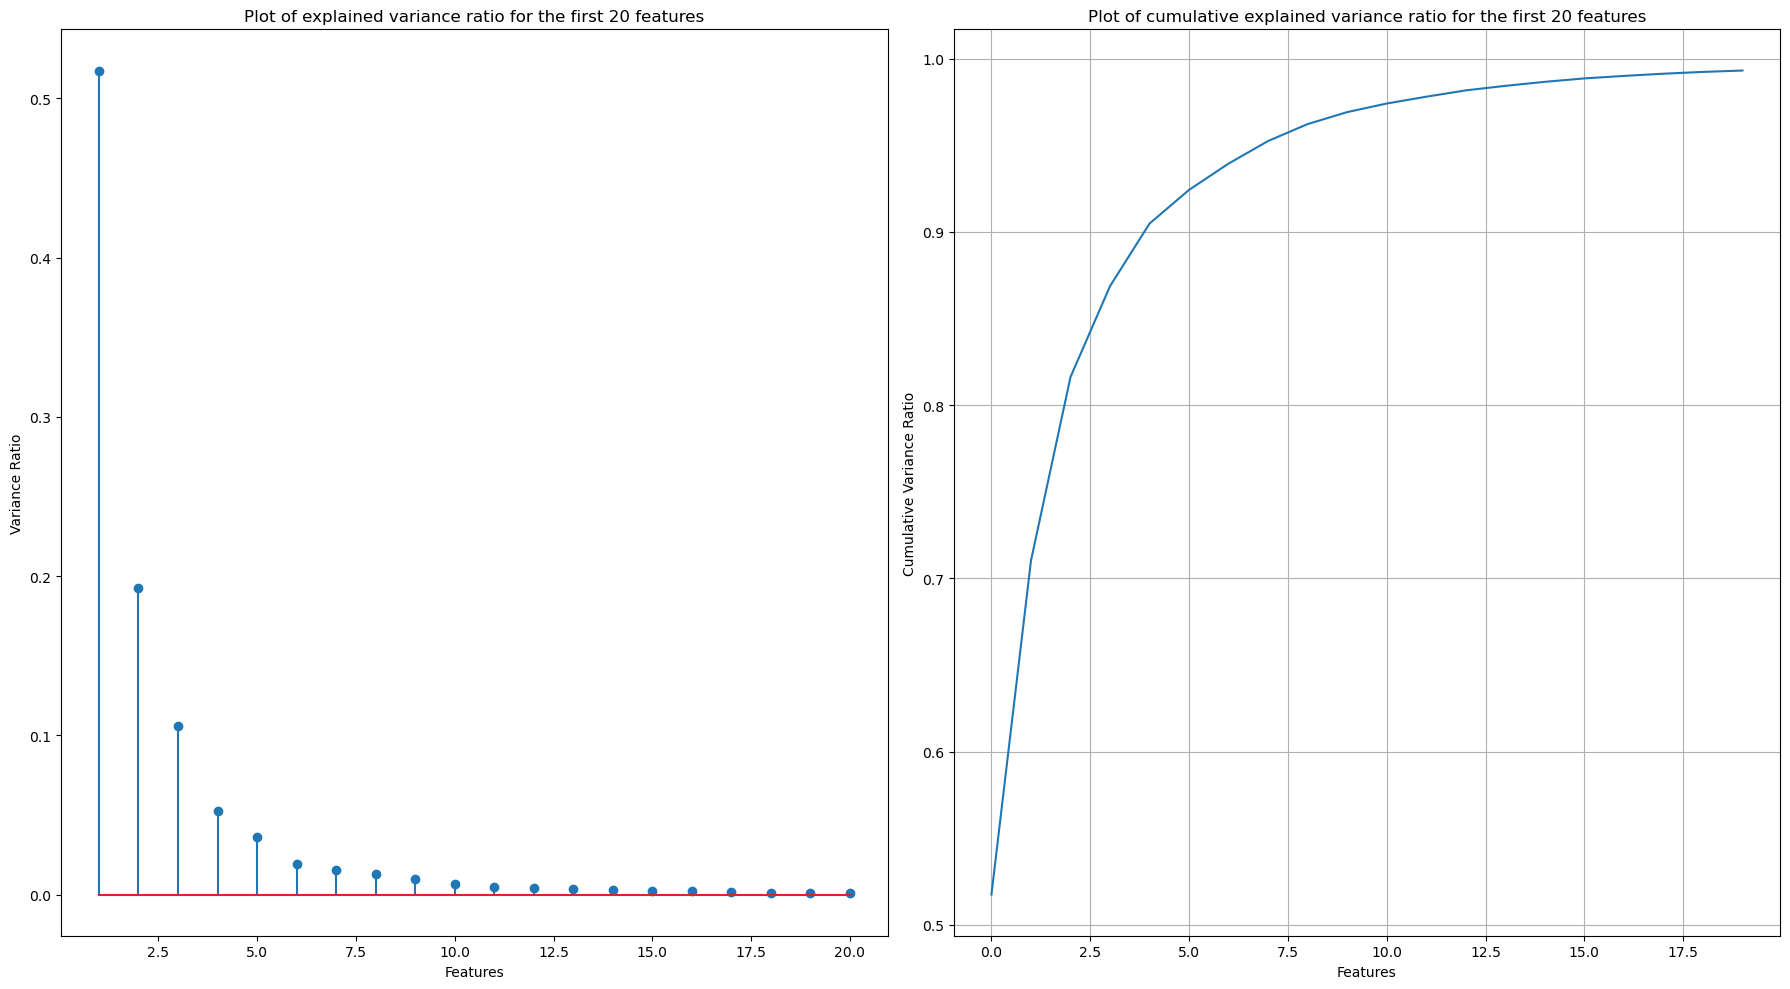

In [ ]:
pca_plot = PCA()
pca_plot.fit(data_train)
train_pca_plot = pca_plot.transform(data_train)

plt.figure(figsize=(18,10))
plt.subplot(1, 2, 1)
plt.stem(np.arange(1, 21), pca_plot.explained_variance_ratio_[0:20])
plt.title("Plot of explained variance ratio for the first 20 features")
plt.xlabel("Features")
plt.ylabel("Variance Ratio")


cumulative_x = []
sum_x = 0
for var in pca_plot.explained_variance_ratio_[0:20] :
    sum_x += var
    cumulative_x.append(sum_x)
    
plt.subplot(1, 2, 2)
plt.plot(cumulative_x)
plt.title("Plot of cumulative explained variance ratio for the first 20 features")
plt.xlabel("Features")
plt.ylabel("Cumulative Variance Ratio")

plt.tight_layout()
plt.grid()
plt.show()

### Creating every x and y train/test/val sets

In [ ]:
components_to_keep = 6

data_train = train.iloc[:, :250]
label_train = train.iloc[:, -1]

data_test = test.iloc[:, :250]
label_test = test.iloc[:, -1]

data_val = val.iloc[:, :250]
label_val = val.iloc[:, -1]

y_train = label_train.to_numpy()
y_test = label_test.to_numpy()
y_val = label_val.to_numpy()


# PCA  definition
pca_train = PCA(n_components = components_to_keep)
pca_test = PCA(n_components = components_to_keep)
pca_val = PCA(n_components = components_to_keep)

# Fit
pca_train.fit(data_train)
pca_test.fit(data_test)
pca_val.fit(data_val)

# Transform
train_pca = pca_train.transform(data_train)
test_pca = pca_test.transform(data_test)
val_pca = pca_val.transform(data_val)



# train/test/val original
x_train = data_train.to_numpy()
x_test = data_test.to_numpy()
x_val = data_val.to_numpy()


# train/test/val pca
x_train_pca = train_pca[:, :250]
x_test_pca = test_pca[:, :250]
x_val_pca = val_pca[:, :250]

# Deep Neural Network

### Defining all options

In [ ]:
# Defining the layer sizes we will try on our MLP model
layers = [(50), (25, 25), (50, 50), (100, 100), (100, 75, 50)]

# Defining the different activation functions we will try on our MLP model
activation_functions = ['relu', 'logistic', 'tanh']

# Defining the differnet solvers we will try on our MLP model
solvers = ['adam', 'sgd']

# Defining the range for α which we will try our MLP model on
alphas = [0.0001, 0.001, 0.01, 0.1]

In [ ]:
### Initial values

best_layer = layers[2]
best_function = activation_functions[0]
best_solver = solvers[0]
best_alpha = alphas[0]

## For Original Data

### Testing : Activation functions

In [ ]:
# Testing the effect of activation functions
activation_functions_scores = []

hyperparameters = [best_layer, best_function, best_solver, best_alpha]

for act_fctn in activation_functions :
    deep_neural_network = MLPClassifier(
                                    hidden_layer_sizes = hyperparameters[0],
                                    activation         = act_fctn,
                                    solver             = hyperparameters[2], 
                                    alpha              = hyperparameters[3], 
                                    max_iter=1000, shuffle=True, random_state=42)
    deep_neural_network.fit(x_train, y_train)
    score = scores(deep_neural_network, x_train, x_val, y_train, y_val)
    activation_functions_scores.append([act_fctn, score])

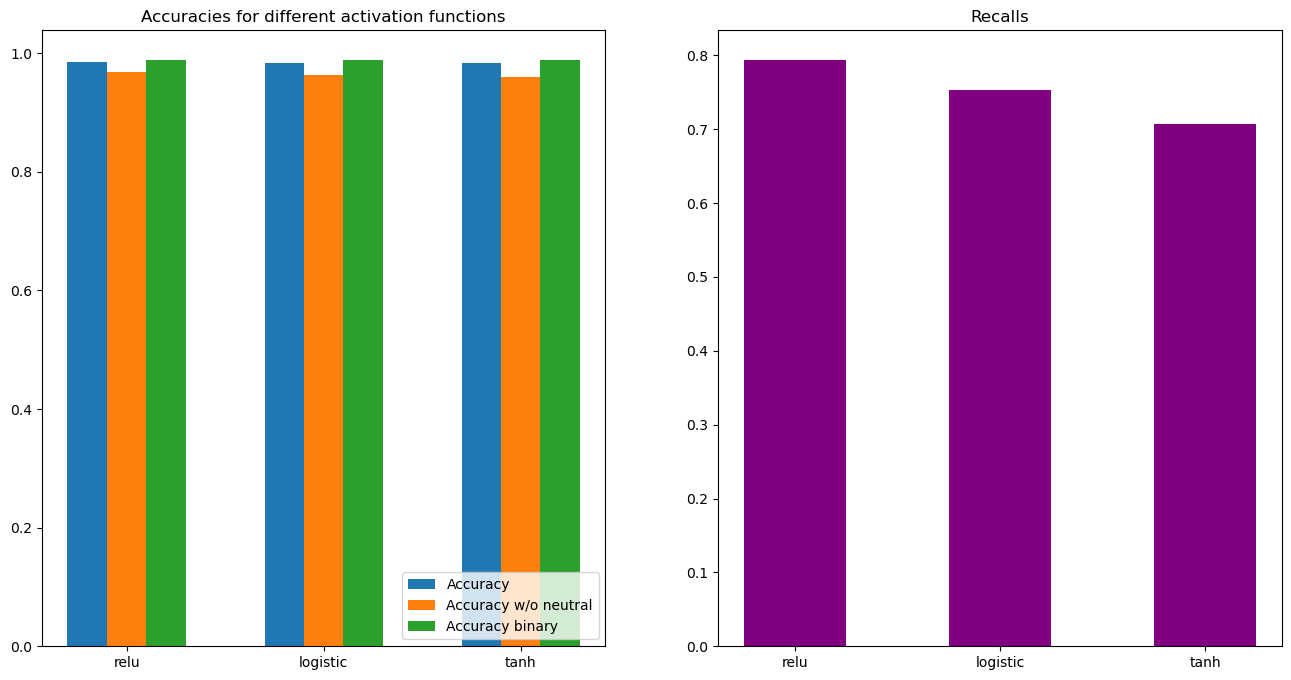

In [ ]:
# Show the table of scores
bar_plot(activation_functions, activation_functions_scores, "Accuracies for different activation functions")

In [ ]:
best_function = 'relu'

### Testing : Solvers

In [ ]:
# Testing the effect of solvers
solvers_scores = []

hyperparameters = [best_layer, best_function, best_solver, best_alpha]

for solv in solvers :
    deep_neural_network = MLPClassifier(
                                    hidden_layer_sizes = hyperparameters[0],
                                    activation         = hyperparameters[1],
                                    solver             = solv, 
                                    alpha              = hyperparameters[3], 
                                    max_iter=1000, shuffle=True, random_state=42)
    deep_neural_network.fit(x_train, y_train)
    score = scores(deep_neural_network, x_train, x_val, y_train, y_val)
    solvers_scores.append([solv, score])

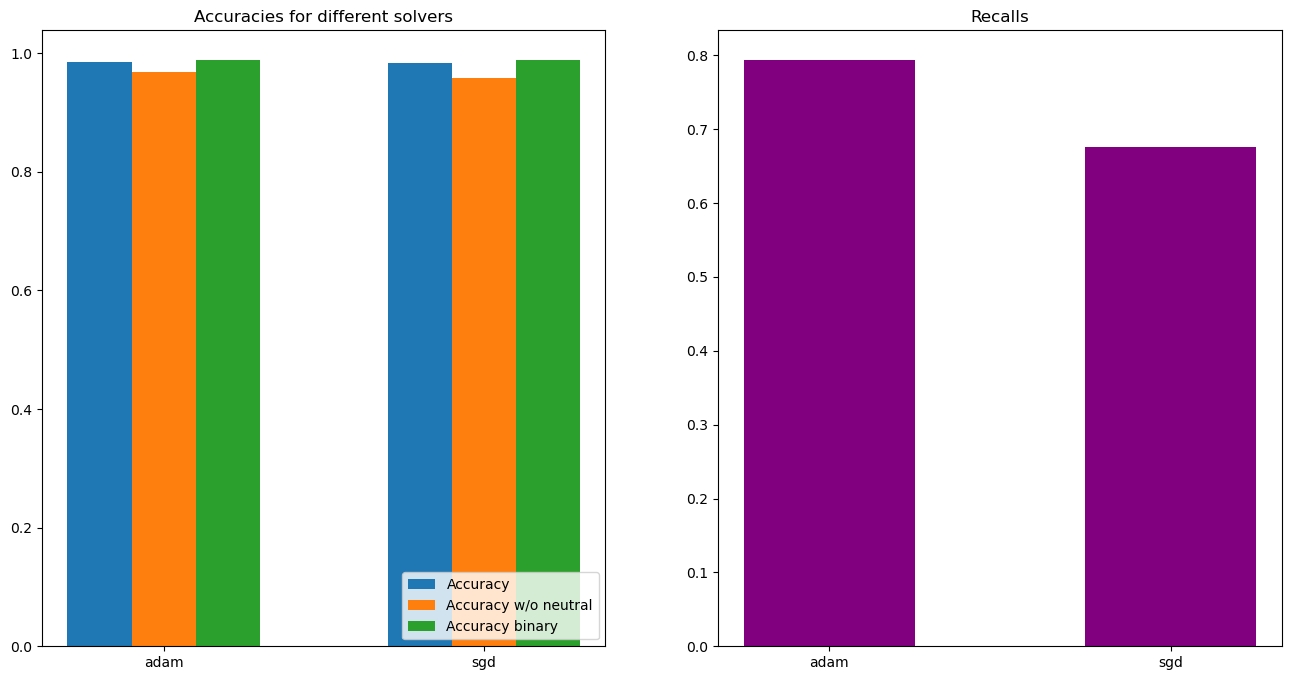

In [ ]:
# Show the table of scores
bar_plot(solvers, solvers_scores, "Accuracies for different solvers")

In [ ]:
best_solver = 'adam'

### Testing : Alphas

In [ ]:
# Testing the effect of alphas
alpha_scores = []

hyperparameters = [best_layer, best_function, best_solver, best_alpha]

for alph in alphas :
    deep_neural_network = MLPClassifier(
                                    hidden_layer_sizes = hyperparameters[0],
                                    activation         = hyperparameters[1],
                                    solver             = hyperparameters[2], 
                                    alpha              = alph, 
                                    max_iter=1000, shuffle=True, random_state=42)
    deep_neural_network.fit(x_train, y_train)
    score = scores(deep_neural_network, x_train, x_val, y_train, y_val)
    alpha_scores.append([alph, score])

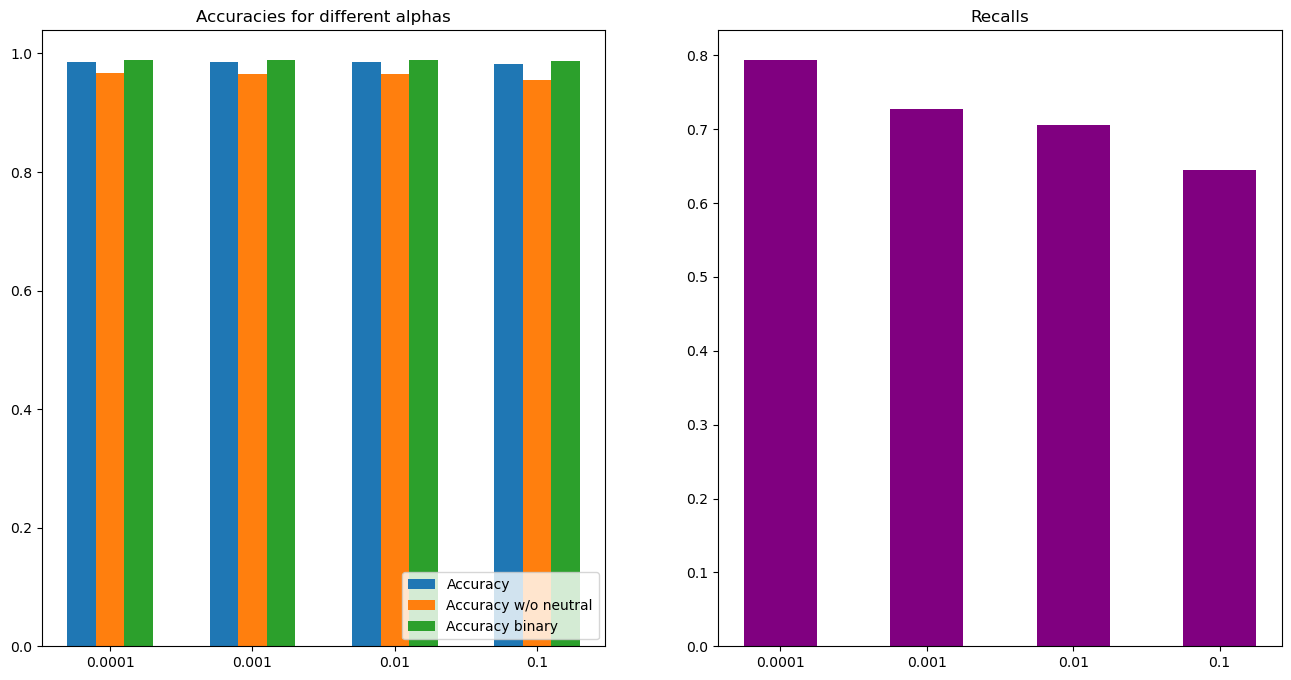

In [ ]:
label_alphas = [str(a) for a in alphas]
bar_plot(label_alphas, alpha_scores, "Accuracies for different alphas")

In [ ]:
best_alpha = 0.0001

### Testing : Layers

In [ ]:
# Testing the effect of Layers
layers_scores = []

hyperparameters = [best_layer, best_function, best_solver, best_alpha]

for lay in layers :
    deep_neural_network = MLPClassifier(
                                    hidden_layer_sizes = lay,
                                    activation         = hyperparameters[1],
                                    solver             = hyperparameters[2], 
                                    alpha              = hyperparameters[3], 
                                    max_iter=1000, shuffle=True, random_state=42)
    deep_neural_network.fit(x_train, y_train)
    score = scores(deep_neural_network, x_train, x_val, y_train, y_val)
    layers_scores.append([lay, score])

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


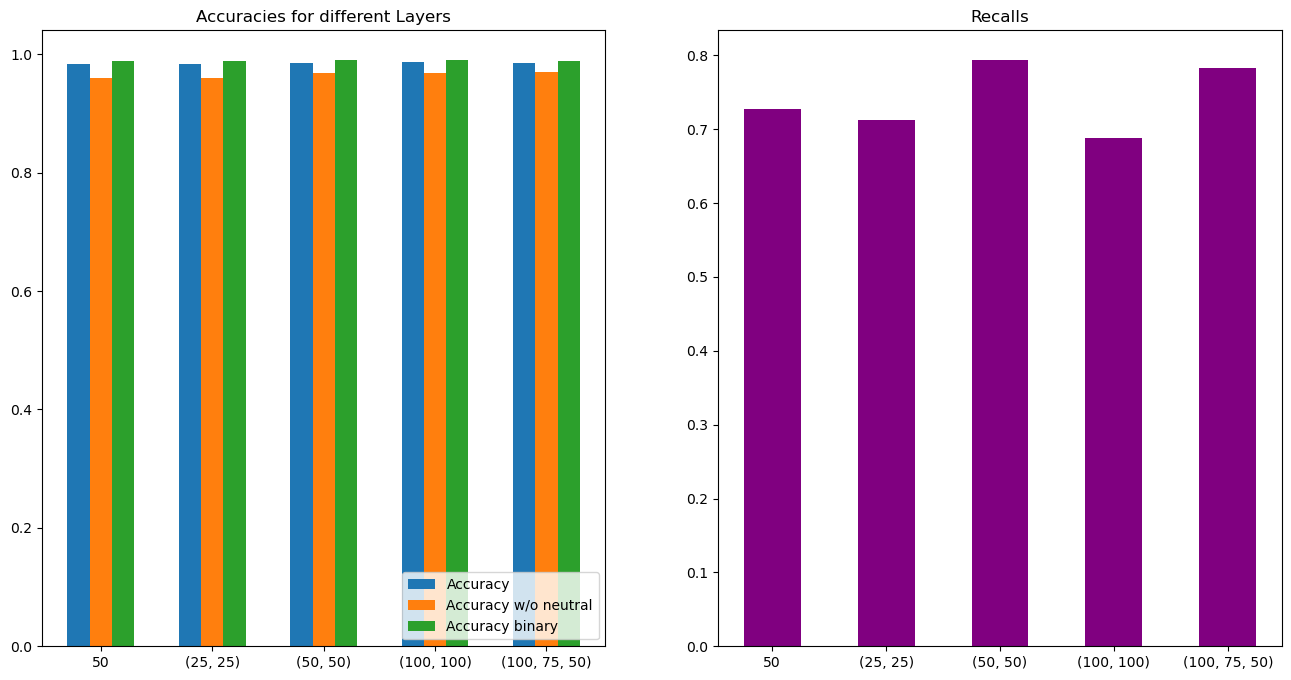

In [ ]:
label_layers = [str(element) for element in layers]
bar_plot(label_layers, layers_scores, "Accuracies for different Layers")

In [ ]:
# Testing the effect of Layers
layers_scores2 = []

hyperparameters = [best_layer, best_function, best_solver, best_alpha]

layers2 = [(i, i) for i in range (2, 52, 2)]

for lay in layers2 :
    deep_neural_network = MLPClassifier(
                                    hidden_layer_sizes = lay,
                                    activation         = hyperparameters[1],
                                    solver             = hyperparameters[2], 
                                    alpha              = hyperparameters[3], 
                                    max_iter=1000, shuffle=True, random_state=42)
    deep_neural_network.fit(x_train, y_train)
    score = scores(deep_neural_network, x_train, x_val, y_train, y_val)
    layers_scores2.append([lay, score])

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


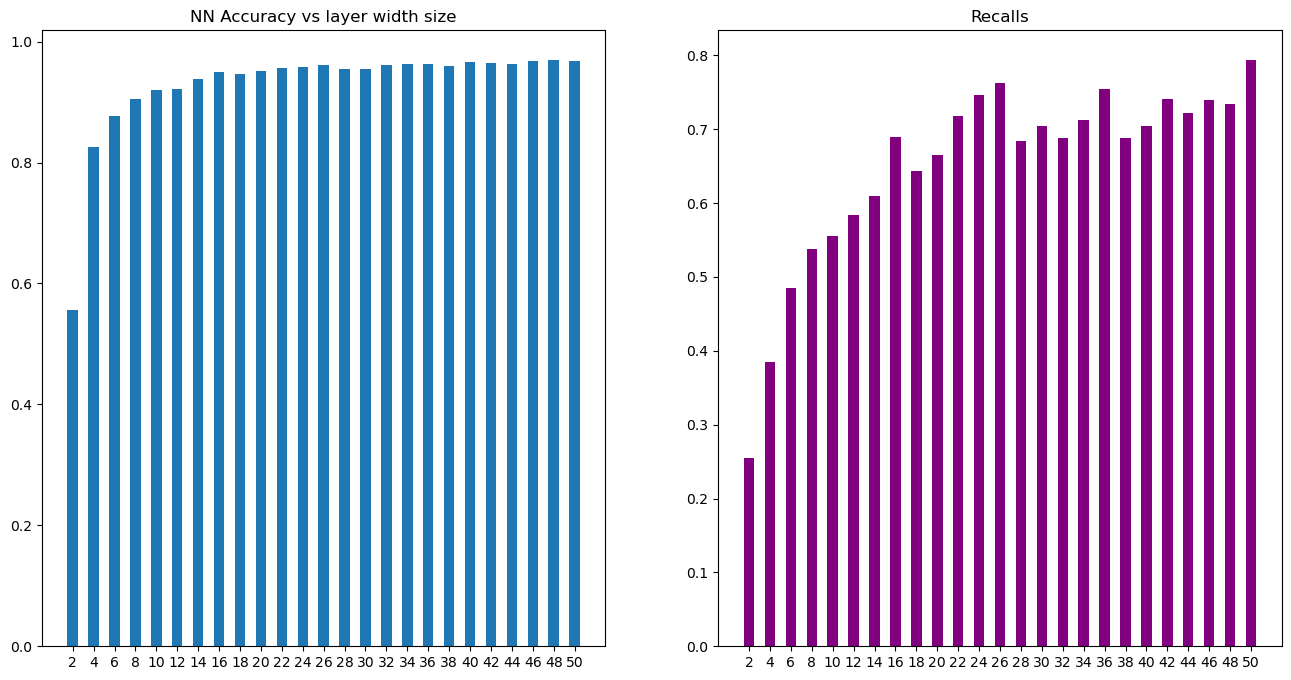

In [ ]:
label_layers2 = [str(element) for element in layers2]

acc = [layers_scores2[i][1][0] for i in range (len(layers_scores2))]
acc_nn = [layers_scores2[i][1][1] for i in range (len(layers_scores2))]
acc_bin = [layers_scores2[i][1][2] for i in range (len(layers_scores2))]
recalls = [layers_scores2[i][1][3] for i in range (len(layers_scores2))]
accuracies = ["Accuracy", "Accuracy w/o neutral", "Accuracy binary"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
width = 0.5

ax1.bar(np.arange(len(label_layers2)), acc_nn, width)
ax1.set_title("NN Accuracy vs layer width size")
ax1.set_xticks(np.arange(len(label_layers2)), np.arange(2, 52, 2))
ax2.bar(label_layers2, recalls, width=0.5, color='purple')
ax2.set_title("Recalls")
ax2.set_xticks(np.arange(len(label_layers2)), np.arange(2, 52, 2))

plt.show()

## Testing best model

In [ ]:
best_score = []
hyperparameters = [(26, 26), best_function, best_solver, best_alpha]
deep_neural_network = MLPClassifier(
                                hidden_layer_sizes = hyperparameters[0],
                                activation         = hyperparameters[1],
                                solver             = hyperparameters[2], 
                                alpha              = hyperparameters[3], 
                                max_iter=1000, shuffle=True, random_state=42)
deep_neural_network.fit(x_train, y_train)
score = scores(deep_neural_network, x_train, x_test, y_train, y_test)
best_score.append(['Best hyperparameters', score])

['Best hyperparameters', [0.9817268158976702, 0.9593377868138252, 0.9872087711283691, 0.7278722789265848]]


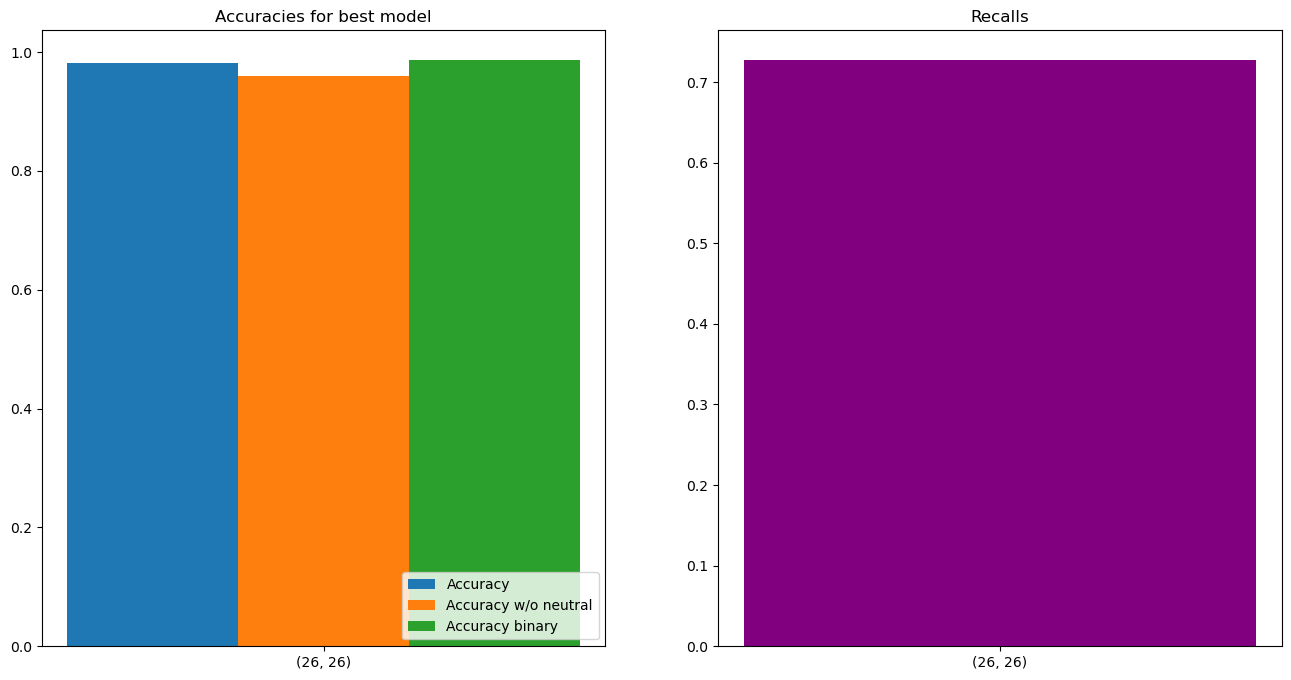

In [ ]:
bar_plot(['(26, 26)'], best_score, "Accuracies for best model")
for pair in best_score :
    print(pair)

## For PCA

### Testing : Layers

In [ ]:
# Testing the effect of Layers
layers_scores = []

hyperparameters = [best_layer, best_function, best_solver, best_alpha]

for lay in layers :
    deep_neural_network_pca = MLPClassifier(
                                    hidden_layer_sizes = lay,
                                    activation         = hyperparameters[1],
                                    solver             = hyperparameters[2], 
                                    alpha              = hyperparameters[3], 
                                    max_iter=1000, shuffle=True, random_state=42)
    deep_neural_network_pca.fit(x_train_pca, y_train)
    score = scores(deep_neural_network_pca, x_train_pca, x_val_pca, y_train, y_val)
    layers_scores.append([lay, score])

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


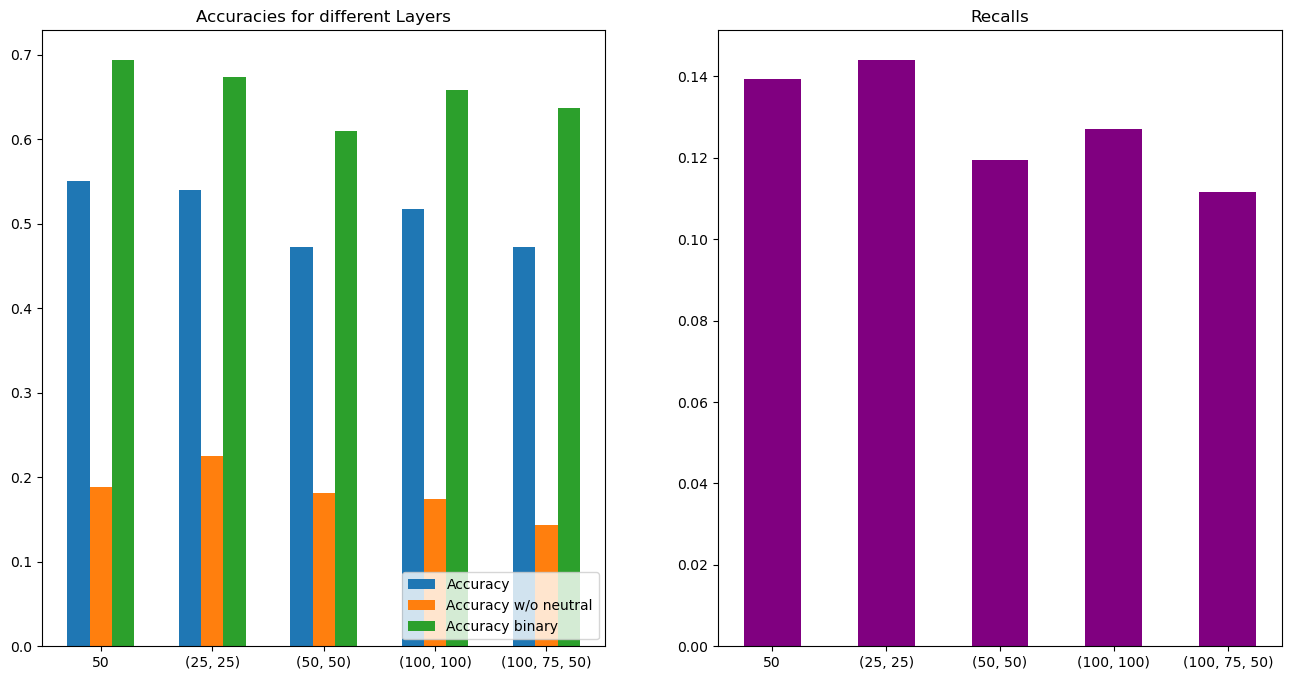

In [ ]:
label_layers = [str(element) for element in layers]
bar_plot(label_layers, layers_scores, "Accuracies for different Layers")

In [ ]:
for i in range (len(layers_scores)) :
    print("Accuracy with layers ", layers_scores[i][0], " : ", layers_scores[i][1][0])

Accuracy with layers  50  :  0.5502969392416629
Accuracy with layers  (25, 25)  :  0.5397441754225674
Accuracy with layers  (50, 50)  :  0.473184102329831
Accuracy with layers  (100, 100)  :  0.5180904522613066
Accuracy with layers  (100, 75, 50)  :  0.4728186386477844
